# Simple Neural Networks on MNIST Handwritten digits recognition

In [1]:
import pandas as pd
import numpy as np
from keras.preprocessing.image import load_img, array_to_img
from keras.utils.np_utils import to_categorical

from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
import matplotlib.pyplot as plt
%matplotlib inline

from keras.datasets import mnist

In [121]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()
(X_train_,y_train_),(X_test_,y_test_) = mnist.load_data()

In [122]:
X_train.shape

(60000, 28, 28)

In [123]:
y_train.shape

(60000,)

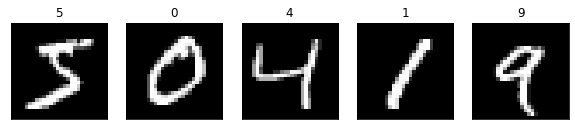

In [125]:
# Display some images
fig, axes = plt.subplots(ncols=5, sharex=False, 
    sharey=True, figsize=(10, 4))
for i in range(5):
    axes[i].set_title(y_train[i])
    axes[i].imshow(X_train[i], cmap='gray')
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show()

## Image data preprocessing

In [107]:
image_height, image_width = 28,28

In [126]:
X_train = X_train.reshape(60000, image_height*image_width)
X_test = X_test.reshape(10000, image_height*image_width)
print(X_train.shape, X_test.shape)

(60000, 784) (10000, 784)


In [150]:
#print(X_train[0])
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")
X_train/=255.0
X_test/=255.0
#print(X_train[0])

In [128]:
#1D to 10 bins representing 10 digits
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)
print(y_train.shape, y_test.shape)

(60000, 10) (10000, 10)


### Building Neural Nets

In [129]:
model = Sequential()

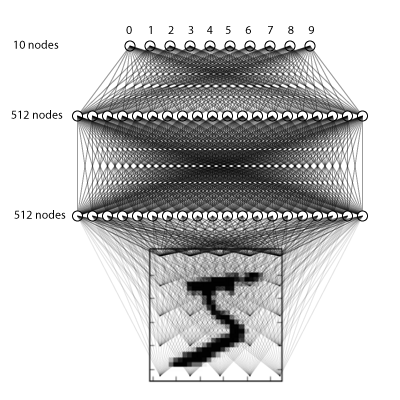

In [130]:
#fully connected layer
model.add(Dense(512, activation = 'relu', input_shape = (784,)))
model.add(Dense(512, activation = 'relu'))

#output node
model.add(Dense(10,activation = 'softmax'))

### Compiling the model

In [131]:
model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [132]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_18 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_19 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [133]:
# layer1 = (784 pixels * nodes 512+ parameters 512) = 401920 params
# Layer2 = (512 input nodes * nodes 512 + parameters 512) = 262656 params
# layer 3 = (512 input nodes * 10 nodes (output) +10 parameters) = 5130 params

### Model training

In [134]:
history = model.fit(X_train, y_train, epochs = 20, validation_data = (X_test, y_test))

Epoch 1/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3130 - accuracy: 0.9038 - val_loss: 0.1038 - val_accuracy: 0.9655
Epoch 2/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0816 - accuracy: 0.9747 - val_loss: 0.0795 - val_accuracy: 0.9749
Epoch 3/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0525 - accuracy: 0.9828 - val_loss: 0.0768 - val_accuracy: 0.9754
Epoch 4/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0393 - accuracy: 0.9867 - val_loss: 0.0713 - val_accuracy: 0.9788
Epoch 5/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0312 - accuracy: 0.9898 - val_loss: 0.0874 - val_accuracy: 0.9777
Epoch 6/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0261 - accuracy: 0.9918 - val_loss: 0.0832 - val_accuracy: 0.9793
Epoch 7/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0225 - accuracy: 0.9932 - val_loss: 0.0910 - val_accuracy

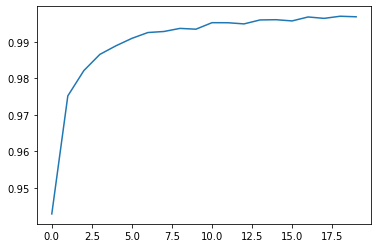

In [135]:
plt.plot(history.history["accuracy"])

### Accuracy and Validation Accuracy with Loss

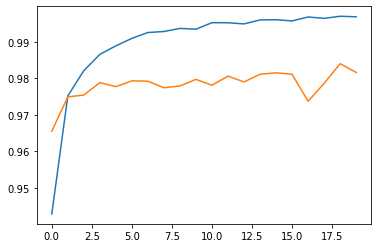

In [136]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])

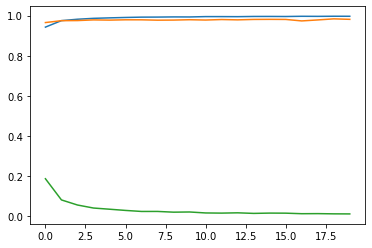

In [137]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.plot(history.history["loss"])

# Model Evaluation

In [138]:
sc = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1211 - accuracy: 0.9816


In [148]:
pred = model.predict(X_test) #
#pred

In [140]:
# output of pred is in the shape 10000, 10 need to get the orginal output
pred  = np.argmax(pred, axis = 1)
pred

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

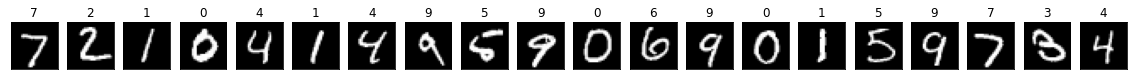

In [145]:
fig, axes = plt.subplots(ncols=20, sharex=False,
                         sharey=True, figsize=(20, 8))
for i in range(20):
    axes[i].set_title(pred[i])
    axes[i].imshow(X_test_[i], cmap='gray')
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show()